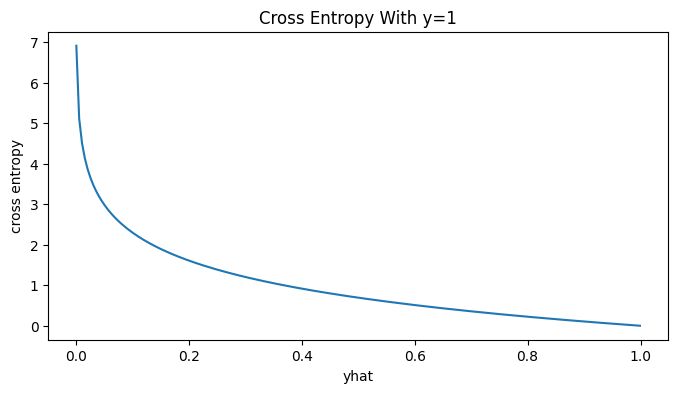

In [6]:
# Tính cross entropy theo yhat và y
def _cross_entropy(yhat, y):
  return -(y*np.log(yhat)+(1-y)*np.log((1-yhat)))
# Khởi tạo gía trị yhat từ 0 đến 1
yhat = np.linspace(0.001, 0.999, 200)

# Hàm visualize cross entropy
def _plot_crs(yhat, y):
  cross_entropy = _cross_entropy(yhat, y)
  plt.figure(figsize = (8, 4))
  plt.plot(yhat, cross_entropy)
  plt.xlabel('yhat')
  plt.ylabel('cross entropy')
  plt.title('Cross Entropy With y={}'.format(y))
  plt.show()

_plot_crs(yhat, y=1)

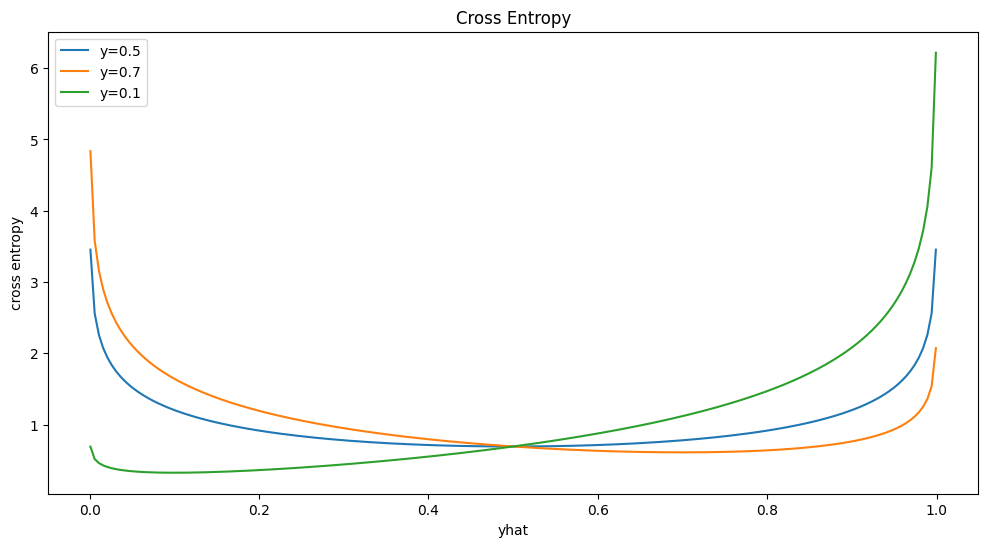

In [7]:
crs1 = _cross_entropy(yhat, y=0.5)
crs2 = _cross_entropy(yhat, y=0.7)
crs3 = _cross_entropy(yhat, y=0.1)
plt.figure(figsize = (12, 6))
plt.plot(yhat, crs1, label='y=0.5')
plt.plot(yhat, crs2, label='y=0.7')
plt.plot(yhat, crs3, label='y=0.1')
plt.xlabel('yhat')
plt.ylabel('cross entropy')
plt.title('Cross Entropy')
plt.legend(loc='best')
plt.show()

BAD: 1 = Hồ sơ vay là vi phạm hoặc mất khả năng trả nợ; 0 = hồ sơ vay đã và đang trả nợ.

LOAN: Số tiền yêu cầu cho vay.

MORTDUE: Số tiền đến hạn của khoản thế chấp hiện có.

VALUE: Giá trị tài sản hiện tại.

REASON: DebtCon = nợ hợp nhất; HomeImp = cải thiện nhà.

JOB: Thể loại nghề nghiệp.

YOJ: Số năm kinh nghiệm trong nghề nghiệp hiện tại.

DEROG: Số lượng báo cáo không tín nhiệm.

DELINQ: Số hạn mức tín dụng quá hạn.

CLAGE: Tuổi của hạn mức tín dụng cũ nhất tính theo tháng.

NINQ: Số câu hỏi tín dụng gần đây.

CLNO: Số lượng hạn mức tín dụng.

DEBTINC: Tỷ lệ nợ trên thu nhập.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [11]:
import pandas as pd

df = pd.read_csv('/Users/chauthanhuy/Downloads/hmeq.csv', header = 0, sep = ',')
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


number of numeric field:  11


/var/folders/1q/ncwkwr814hvcmkdzs5qf08740000gn/T/ipykernel_71539/3663308904.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],
/var/folders/1q/ncwkwr814hvcmkdzs5qf08740000gn/T/ipykernel_71539/3663308904.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],
/var/folders/1q/ncwkwr

Error CLNO


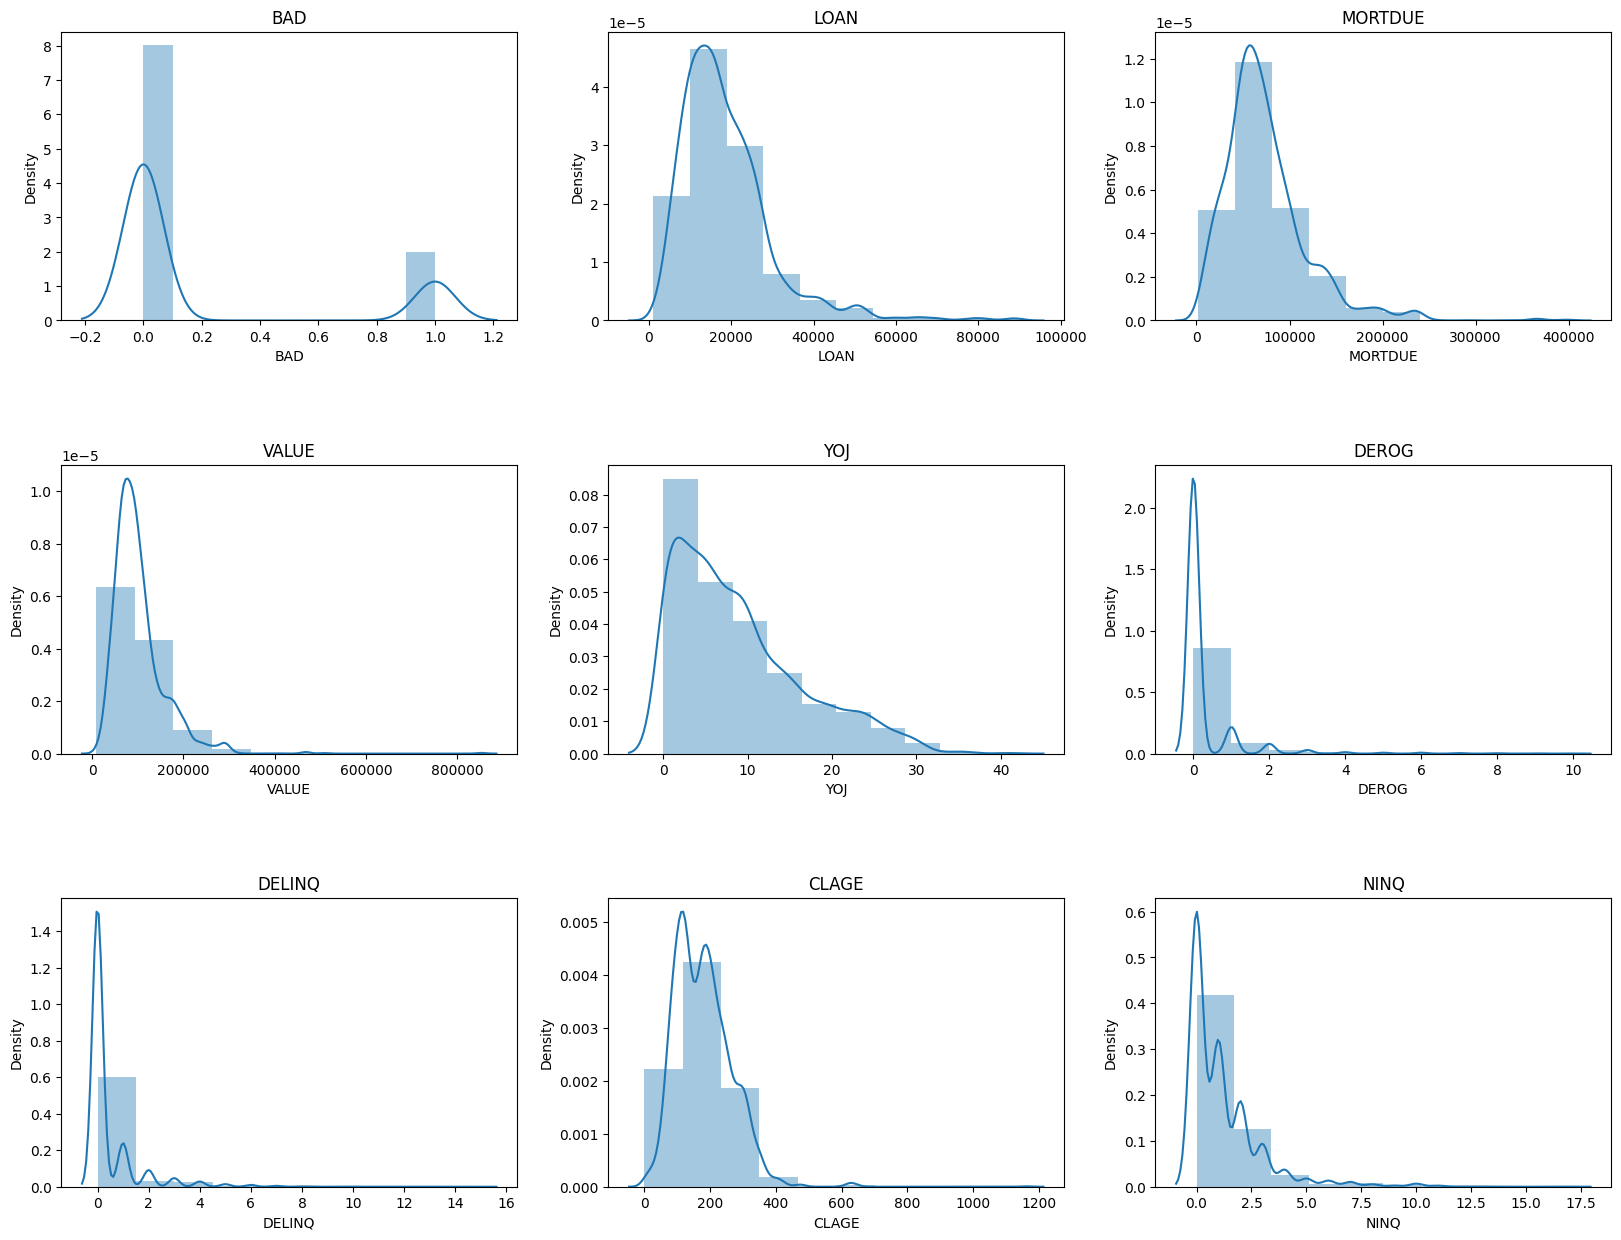

In [12]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

numeric_cols = df.select_dtypes(include=['float','int']).columns

def _plot_numeric_classes(df, col, bins=10, hist=True, kde=True):
    sns.distplot(df[col],
                 bins = bins,
                 hist = hist,
                 kde = kde)

def _distribution_numeric(df, numeric_cols, row=3, col=3, figsize=(20, 15), bins = 10):
    '''
    numeric_cols: list các tên cột
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    bins: số lượng bins phân chia trong biểu đồ distribution
    '''
    print('number of numeric field: ', len(numeric_cols))
    assert row*(col-1) < len(numeric_cols)
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(df, numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break

_distribution_numeric(df, numeric_cols)

number of category field:  2


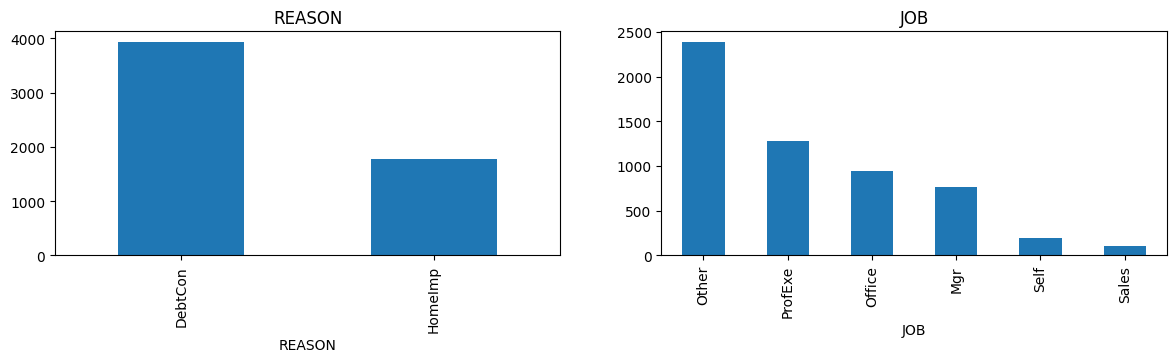

In [15]:
# Đối với biến phân loại
cate_cols = df.select_dtypes('O').columns

def _plot_bar_classes(df, cols):
    df[cols].value_counts().plot.bar()

def _distribution_cate(df, cate_cols, row = 1, col = 2, figsize = (20, 5)):
  '''
  cate_cols: list các tên cột
  row: số lượng dòng trong lưới đồ thị
  col: số lượng cột trong lưới đồ thị
  figsize: kích thước biểu đồ
  '''
  print('number of category field: ', len(cate_cols))
  plt.figure(figsize = figsize)
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)    
  for i in range(1, len(cate_cols)+1, 1):
    try:
      plt.subplot(row, col, i)
      _plot_bar_classes(df, cate_cols[i-1])
      plt.title(cate_cols[i-1])
    except:
      break

_distribution_cate(df, cate_cols, row = 4, col = 4, figsize = (30, 16))

### Train model

In [16]:
# Chia train/test theo tỷ lệ 80:20.
df_train, df_test = train_test_split(df, test_size=0.2, stratify = df['BAD'])
X_train = df_train.copy()
y_train = X_train.pop("BAD")

X_test = df_test.copy()
y_test = X_test.pop("BAD")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4768, 12) (4768,)
(1192, 12) (1192,)


Xây dựng pipeline xử lý missing data và outliers.

In [17]:
# Lấy list names của các biến phân loại và biến liên tục.
cat_names = list(X_train.select_dtypes('object').columns)
num_names = list(X_train.select_dtypes(['float', 'int']).columns)

In [18]:
# Pipeline xử lý cho biến phân loại
cat_pl= Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')), # Xử lý missing data bằng cách thay thế most frequent
        ('onehot', OneHotEncoder()), # Biến đổi giá trị của biến phân loại thành véc tơ OneHot
    ]
)

In [19]:
# Pipeline xử lý cho biến liên tục
num_pl = Pipeline(
    steps=[
           ('imputer', KNNImputer(n_neighbors=7)), # Xử lý missing data bằng cách dự báo KNN với n=7.
           ('scaler', MinMaxScaler()) # Xử lý missing data bằng MinMax scaler
    ]
)

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pl, num_names), # áp dụng pipeline cho biến liên tục
        ('cat', cat_pl, cat_names), # áp dụng pipeline cho biến phân loại
    ]
)

In [21]:
LogisticRegression(penalty='l2',
tol=0.0001, 
C=1.0, 
fit_intercept=True, 
class_weight=None, 
solver='lbfgs', 
max_iter=100)

LogisticRegression()

In [ ]:
completed_pl = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("classifier", LogisticRegression(
            penalty='l2', 
            C=0.5, 
            max_iter=200, 
            class_weight={0: 0.3, 1: 0.7}
        ))
    ]
)


# training
completed_pl.fit(X_train, y_train)

# accuracy
y_train_pred = completed_pl.predict(X_train)
print(f"Accuracy on train: {accuracy_score(list(y_train), list(y_train_pred)):.2f}")

y_pred = completed_pl.predict(X_test)
print(f"Accuracy on test: {accuracy_score(list(y_test), list(y_pred)):.2f}")

Accuracy on train: 0.83
Accuracy on test: 0.81
